https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data

This maps two charts, one of which is all of the subway train rides and the second is a NYC Flood Vulnerability index. It aims to see the impact of potential floods on NYC subways. 

However, it only shows the subway stations as vulnerable and not the infrastructure between stops or the actual lines. 

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.cm as cm

import matplotlib.colors as mcolors

import geopandas as gpd
import folium
import matplotlib.pyplot as plt

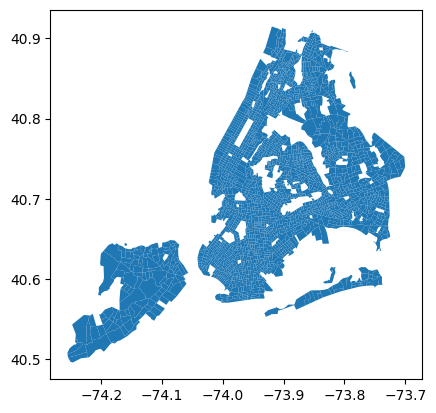

In [3]:
# Read the shapefile
df = pd.read_csv("New_York_City_s_Flood_Vulnerability_Index_20240930.csv")

# Read the shapefile
gdf = gpd.read_file("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp")

# Plot the shapefile
gdf.plot()

# Show the plot
plt.show()

In [4]:
gdf['ss_cur'] = gdf['ss_cur'].fillna(0)
print(gdf.head(2))

         geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5      0    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...  


In [5]:
# Define your custom color list (6 colors)
colors = ['#ffffff', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']  # Customize these colors

# Create a custom colormap
cmap = ListedColormap(colors)

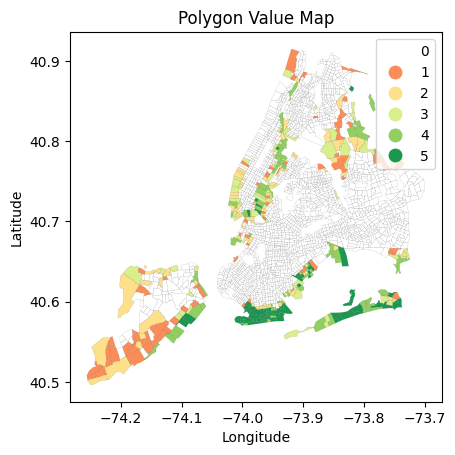

In [6]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf.plot(column='ss_cur', legend=True, cmap=cmap, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [7]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

In [8]:
gdf

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1     36047058000     5      0    NaN      2     NaN     NaN     NaN   
2     36047053200     5      0    NaN    NaN     NaN     NaN     NaN   
3     36005036300     5      0    NaN    NaN     NaN     NaN     NaN   
4     36081035700     5      1      1      1     NaN     NaN     NaN   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3     NaN     NaN     NaN   
2205  36061025500     1      0    NaN    NaN     NaN     NaN     NaN   
2206  36061027700     1      0    NaN    NaN     NaN     NaN     NaN   
2207  36005009302   NaN      0    NaN    NaN     NaN     NaN     NaN   
2208  36005028400   NaN      2      1      1     NaN     NaN     NaN   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73.95776 40.60099, -73.95683 40.601...  
2     POLYGON ((-73.96230 40.62996, -73.96137 40.630...  
3     POLYGON ((-73.88545 40.84377, -73.88529 40.844...  
4     POLYGON ((-73.87639 40.76900, -73.87602 40.770...  
...                                                 ...  
2204  POLYGON ((-74.00479 40.72362, -74.00458 40.724...  
2205  POLYGON ((-73.95416 40.84799, -73.95283 40.851...  
2206  POLYGON ((-73.93008 40.85431, -73.92964 40.854...  
2207  POLYGON ((-73.90307 40.80988, -73.89917 40.812...  
2208  POLYGON ((-73.84494 40.84821, -73.84359 40.850...  

[2209 rows x 9 columns]

In [9]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

#https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
# Define a function to assign colors based on values
def get_fill_color(value):
    if value == 0:
        return 'green'
    elif value == 1:
        return 'purple'
    elif value == 2:
        return 'orange'
    elif value == 3:
        return 'yellow'
    elif value == 4:
        return 'pink'
    elif value == 5:
        return 'black'
    else:
        return 'white'  # default color if value is out of range

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {
        #"fillColor": "orange",
        "fillColor": get_fill_color(r["ss_cur"]),
        'color':'blue',
        'weight':0.0000001
        })
    folium.Popup(r["geoid"]).add_to(geo_j)
    geo_j.add_to(m)

m



v2

In [10]:
import pandas as pd
from io import StringIO
import requests

In [11]:
def establish_nys_session():
    session = requests.Session()
    # Add headers or authentication if needed
    return session

In [12]:
url = """https://data.ny.gov/resource/wujg-7c2s.csv?$query=SELECT
    date_trunc_y(transit_timestamp) AS year,
    station_complex,
    round(SUM(ridership),0) AS total_ridership
WHERE
    station_complex = 'Vernon Blvd-Jackson Av (7)' AND
    (
        (transit_timestamp >= '2022-07-04T00:00:00' AND transit_timestamp <= '2022-07-04T23:59:59') OR
        (transit_timestamp >= '2023-07-04T00:00:00' AND transit_timestamp <= '2023-07-04T23:59:59')
    )
GROUP BY
    year, station_complex
ORDER BY
    year ASC
"""

url = """https://data.ny.gov/resource/wujg-7c2s.csv?$query=
SELECT 
    station_complex,
    Georeference,
    round(SUM(ridership),0) AS total_ridership
WHERE 
    transit_timestamp >= '2023-12-31T00:00:00' 
    AND 
    transit_timestamp <= '2024-01-01T00:00:00'
GROUP BY 
    station_complex, Georeference
ORDER BY 
    station_complex
"""

session = establish_nys_session()
response = session.get(url)


# Convert the CSV response to a DataFrame
data = StringIO(response.text)

print(data)

df = pd.read_csv(data, header=0)

df

station_complex                  Georeference  total_ridership
0                 103 St (1)  POINT (-73.968376 40.799446)             6150
1                 103 St (6)     POINT (-73.94748 40.7906)             3676
2               103 St (C,B)   POINT (-73.96146 40.796093)             2142
3    103 St-Corona Plaza (7)    POINT (-73.8627 40.749866)            10375
4                 104 St (A)   POINT (-73.837685 40.68171)              417
..                       ...                           ...              ...
478     Woodhaven Blvd (M,R)   POINT (-73.86923 40.733105)             6912
479             Woodlawn (4)   POINT (-73.87875 40.886036)             1624
480        WTC Cortlandt (1)   POINT (-74.01219 40.711834)            13680
481              York St (F)   POINT (-73.98675 40.701397)             8179
482            Zerega Av (6)   POINT (-73.84704 40.836487)              614

[483 rows x 3 columns]

In [13]:
print(gdf)

            geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1     36047058000     5      0    NaN      2     NaN     NaN     NaN   
2     36047053200     5      0    NaN    NaN     NaN     NaN     NaN   
3     36005036300     5      0    NaN    NaN     NaN     NaN     NaN   
4     36081035700     5      1      1      1     NaN     NaN     NaN   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3     NaN     NaN     NaN   
2205  36061025500     1      0    NaN    NaN     NaN     NaN     NaN   
2206  36061027700     1      0    NaN    NaN     NaN     NaN     NaN   
2207  36005009302   NaN      0    NaN    NaN     NaN     NaN     NaN   
2208  36005028400   NaN      2      1      1     NaN     NaN     NaN   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73

In [14]:
df_polygons = gdf
df_points = df

In [15]:
df_points.columns = df_points.columns.str.strip()
df_polygons.columns = df_polygons.columns.str.strip()

gdf1 = gpd.GeoDataFrame(df_points, geometry=gpd.GeoSeries.from_wkt(df_points['Georeference']))
gdf2 = df_polygons

gdf1 is the subway stations
gdf2 is the polygons of the vulnerable areas

In [16]:
gdf1['Georeference'] = gdf1['Georeference'].apply(wkt.loads)  # Convert the Georeference points from WKT format
gdf1 = gpd.GeoDataFrame(gdf1, geometry='Georeference', crs="EPSG:4326")  # Assuming WGS84 for points


In [17]:
gdf2 = gdf2.set_crs("EPSG:4326", allow_override=True)


In [18]:
gdf1

station_complex                Georeference  total_ridership  \
0                 103 St (1)  POINT (-73.96838 40.79945)             6150   
1                 103 St (6)  POINT (-73.94748 40.79060)             3676   
2               103 St (C,B)  POINT (-73.96146 40.79609)             2142   
3    103 St-Corona Plaza (7)  POINT (-73.86270 40.74987)            10375   
4                 104 St (A)  POINT (-73.83768 40.68171)              417   
..                       ...                         ...              ...   
478     Woodhaven Blvd (M,R)  POINT (-73.86923 40.73311)             6912   
479             Woodlawn (4)  POINT (-73.87875 40.88604)             1624   
480        WTC Cortlandt (1)  POINT (-74.01219 40.71183)            13680   
481              York St (F)  POINT (-73.98675 40.70140)             8179   
482            Zerega Av (6)  POINT (-73.84704 40.83649)              614   

                       geometry  
0    POINT (-73.96838 40.79945)  
1    POINT (-73.94748 40.79060)  
2    POINT (-73.96146 40.79609)  
3    POINT (-73.86270 40.74987)  
4    POINT (-73.83768 40.68171)  
..                          ...  
478  POINT (-73.86923 40.73311)  
479  POINT (-73.87875 40.88604)  
480  POINT (-74.01219 40.71183)  
481  POINT (-73.98675 40.70140)  
482  POINT (-73.84704 40.83649)  

[483 rows x 4 columns]

In [19]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   station_complex  483 non-null    object  
 1   Georeference     483 non-null    geometry
 2   total_ridership  483 non-null    int64   
 3   geometry         483 non-null    geometry
dtypes: geometry(2), int64(1), object(1)
memory usage: 15.2+ KB


In [20]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geoid     2209 non-null   object  
 1   fshri     2207 non-null   object  
 2   ss_cur    2209 non-null   object  
 3   ss_50s    517 non-null    object  
 4   ss_80s    612 non-null    object  
 5   tid_20s   78 non-null     object  
 6   tid_50s   87 non-null     object  
 7   tid_80s   173 non-null    object  
 8   geometry  2209 non-null   geometry
dtypes: geometry(1), object(8)
memory usage: 155.4+ KB


https://medium.com/analytics-vidhya/point-in-polygon-analysis-using-python-geopandas-27ea67888bff

In [21]:
def get_pip (gdf, regions):
    r_list = list(regions.geoid)
    #create empty dataframe
    df = pd.DataFrame().reindex_like(gdf).dropna()
    for r in r_list:
        #get geometry for specific region
        pol = (regions.loc[regions.geoid==r])
        pol.reset_index(drop = True, inplace = True)
        #identify those records from gdf that are intersecting with the region polygon
        pip_mask = gdf.within(pol.loc[0, 'geometry'])
        #filter gdf to keep only the intersecting records
        pip_data = gdf.loc[pip_mask].copy()
        #create a new column and assign the region geoid as the value
        pip_data['region']= r
        #append region data to empty dataframe
        df = pd.concat([df,pip_data])
    #checking there are no more than one region assigned to an event    
    print('Original dataframe count=',len(gdf),'\nNew dataframe count=', len(df))
    
    df.reset_index(inplace=True, drop=True)
    df = df.drop(columns='geometry')
    return df

eq_df = get_pip(gdf1, gdf2)


/var/folders/wm/w3d80c152lq65mt41y20p1200000gn/T/ipykernel_53082/2633077353.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pip_data])


Original dataframe count= 483 
New dataframe count= 465


In [22]:
print(eq_df)

              station_complex                Georeference  total_ridership  \
0                Avenue U (Q)  POINT (-73.95593 40.59930)           2757.0   
1                Avenue H (Q)  POINT (-73.96164 40.62927)            920.0   
2                Avenue J (Q)  POINT (-73.96080 40.62504)           1899.0   
3                Elder Av (6)  POINT (-73.87916 40.82858)           2042.0   
4       82 St-Jackson Hts (7)  POINT (-73.88370 40.74766)           3301.0   
..                        ...                         ...              ...   
460                7 Av (F,G)  POINT (-73.98031 40.66627)           4697.0   
461            8 St-NYU (R,W)  POINT (-73.99263 40.73033)           7463.0   
462              Astor Pl (6)  POINT (-73.99107 40.73005)           7718.0   
463  Canal St (J,N,Q,R,W,Z,6)  POINT (-74.00178 40.71953)             70.0   
464                191 St (1)  POINT (-73.92941 40.85522)           2790.0   

          region  
0    36047058000  
1    36047053200  
2    3

In [23]:
eq_df.region.value_counts().max()


6

In [24]:
summed_ridership = eq_df.groupby('region')['total_ridership'].sum()
summed_ridership

region
36005002300    2238.0
36005002702     601.0
36005003100     202.0
36005003900    1741.0
36005004800    1715.0
                ...  
36081099801     438.0
36081100803    1402.0
36081107201      62.0
36085000300    1940.0
36085002100     203.0
Name: total_ridership, Length: 379, dtype: float64

In [25]:
gdf3 = gpd.GeoDataFrame(gdf2)
gdf3

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1     36047058000     5      0    NaN      2     NaN     NaN     NaN   
2     36047053200     5      0    NaN    NaN     NaN     NaN     NaN   
3     36005036300     5      0    NaN    NaN     NaN     NaN     NaN   
4     36081035700     5      1      1      1     NaN     NaN     NaN   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3     NaN     NaN     NaN   
2205  36061025500     1      0    NaN    NaN     NaN     NaN     NaN   
2206  36061027700     1      0    NaN    NaN     NaN     NaN     NaN   
2207  36005009302   NaN      0    NaN    NaN     NaN     NaN     NaN   
2208  36005028400   NaN      2      1      1     NaN     NaN     NaN   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73.95776 40.60099, -73.95683 40.601...  
2     POLYGON ((-73.96230 40.62996, -73.96137 40.630...  
3     POLYGON ((-73.88545 40.84377, -73.88529 40.844...  
4     POLYGON ((-73.87639 40.76900, -73.87602 40.770...  
...                                                 ...  
2204  POLYGON ((-74.00479 40.72362, -74.00458 40.724...  
2205  POLYGON ((-73.95416 40.84799, -73.95283 40.851...  
2206  POLYGON ((-73.93008 40.85431, -73.92964 40.854...  
2207  POLYGON ((-73.90307 40.80988, -73.89917 40.812...  
2208  POLYGON ((-73.84494 40.84821, -73.84359 40.850...  

[2209 rows x 9 columns]

In [26]:
summed_ridership

summed_ridership = summed_ridership.reset_index()
summed_ridership.columns = ['geoid', 'total_ridership']
summed_ridership


geoid  total_ridership
0    36005002300           2238.0
1    36005002702            601.0
2    36005003100            202.0
3    36005003900           1741.0
4    36005004800           1715.0
..           ...              ...
374  36081099801            438.0
375  36081100803           1402.0
376  36081107201             62.0
377  36085000300           1940.0
378  36085002100            203.0

[379 rows x 2 columns]

In [27]:
gdf3 = gdf2

In [28]:
gdf3.head(2)

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0    NaN    NaN     NaN     NaN     NaN   
1  36047058000     5      0    NaN      2     NaN     NaN     NaN   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...

In [29]:
summed_ridership.head(2)

geoid  total_ridership
0  36005002300           2238.0
1  36005002702            601.0

In [30]:
gdf_with_ridership = gdf3.merge(summed_ridership, on = "geoid")
gdf_with_ridership

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0    36047058000     5      0    NaN      2     NaN     NaN     NaN   
1    36047053200     5      0    NaN    NaN     NaN     NaN     NaN   
2    36005005400     5      1      1      2       2       2       1   
3    36081028300     5      0    NaN    NaN     NaN     NaN     NaN   
4    36005008300     5      0    NaN    NaN     NaN     NaN     NaN   
..           ...   ...    ...    ...    ...     ...     ...     ...   
374  36061017200     1      3      4      4     NaN     NaN     NaN   
375  36047015100     1      0    NaN    NaN     NaN     NaN     NaN   
376  36061005700     1      0    NaN    NaN     NaN     NaN     NaN   
377  36061004700     1      3      3      3     NaN     NaN     NaN   
378  36061027700     1      0    NaN    NaN     NaN     NaN     NaN   

                                              geometry  total_ridership  
0    POLYGON ((-73.95776 40.60099, -73.95683 40.601...           2757.0  
1    POLYGON ((-73.96230 40.62996, -73.96137 40.630...           2819.0  
2    POLYGON ((-73.88389 40.82981, -73.88235 40.831...           2042.0  
3    POLYGON ((-73.88654 40.75159, -73.88561 40.751...           3301.0  
4    POLYGON ((-73.90418 40.81309, -73.90380 40.814...           1323.0  
..                                                 ...              ...  
374  POLYGON ((-73.94790 40.79293, -73.94695 40.794...           3095.0  
375  POLYGON ((-73.98544 40.66623, -73.98494 40.666...           4697.0  
376  POLYGON ((-73.99455 40.72941, -73.99406 40.729...          15181.0  
377  POLYGON ((-74.00479 40.72362, -74.00458 40.724...             70.0  
378  POLYGON ((-73.93008 40.85431, -73.92964 40.854...           2790.0  

[379 rows x 10 columns]

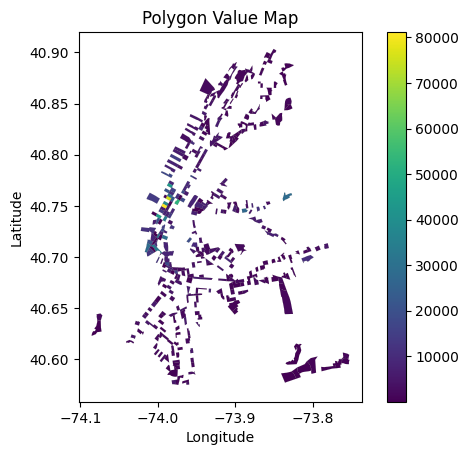

In [31]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf_with_ridership.plot(column='total_ridership', legend=True, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()